In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("titanic_toy.csv")

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
## target is to fill the Age and Fare columns value

In [8]:
X= df.drop(columns=["Survived"])
y=df["Survived"]

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state=42 , test_size=0.2)

In [11]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [12]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [13]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [14]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [15]:
X_train.sample(6)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
695,52.0,13.5000,0,52.0,52.000000,13.5000,13.5000
367,NaN,7.2292,0,28.0,29.498846,7.2292,7.2292
640,20.0,7.8542,0,20.0,20.000000,7.8542,7.8542
454,NaN,8.0500,0,28.0,29.498846,8.0500,8.0500
503,37.0,9.5875,0,37.0,37.000000,9.5875,9.5875
340,2.0,26.0000,2,2.0,2.000000,26.0000,26.0000


In [16]:
features = ['Age', 'Fare']

for feature in features:
    print(f'\n{feature} variance comparison')
    print('Original:', X_train[feature].var())
    print('After median imputation:', X_train[f'{feature}_median'].var())
    print('After mean imputation:', X_train[f'{feature}_mean'].var())



Age variance comparison
Original: 210.2517072477435
After median imputation: 169.20731007048155
After mean imputation: 168.85193366872227

Fare variance comparison
Original: 2761.0314349486343
After median imputation: 2637.012481677765
After mean imputation: 2621.232374951235


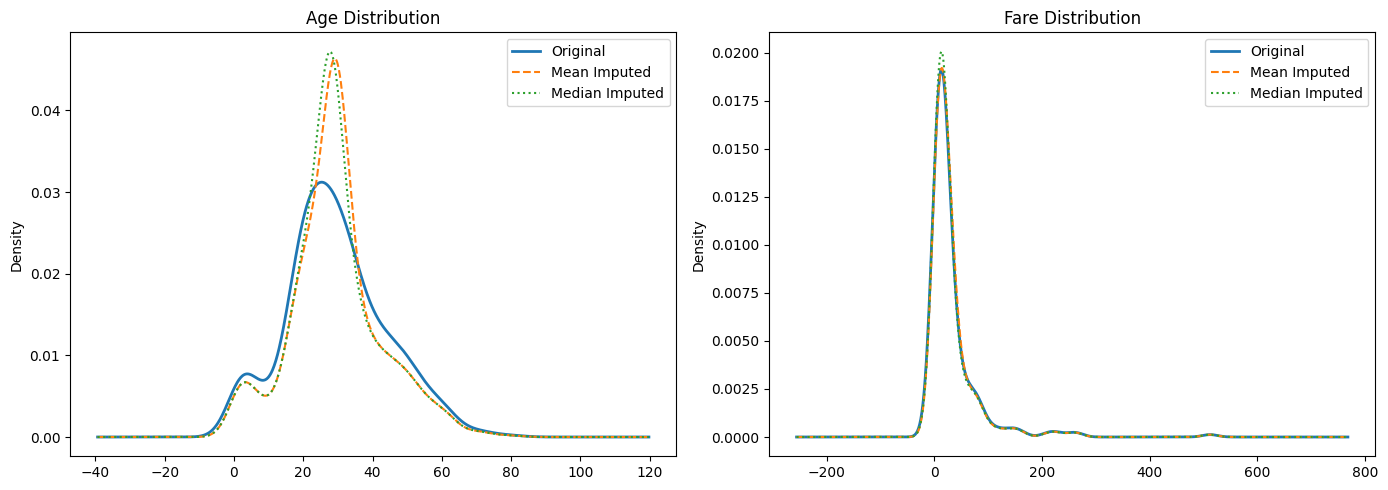

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age KDE
X_train['Age'].plot.kde(ax=axes[0], label='Original', linewidth=2)
X_train['Age_mean'].plot.kde(ax=axes[0], label='Mean Imputed', linestyle='--')
X_train['Age_median'].plot.kde(ax=axes[0], label='Median Imputed', linestyle=':')

axes[0].set_title('Age Distribution')
axes[0].legend()

# Fare KDE
X_train['Fare'].plot.kde(ax=axes[1], label='Original', linewidth=2)
X_train['Fare_mean'].plot.kde(ax=axes[1], label='Mean Imputed', linestyle='--')
X_train['Fare_median'].plot.kde(ax=axes[1], label='Median Imputed', linestyle=':')

axes[1].set_title('Fare Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()


In [19]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [20]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


<Axes: >

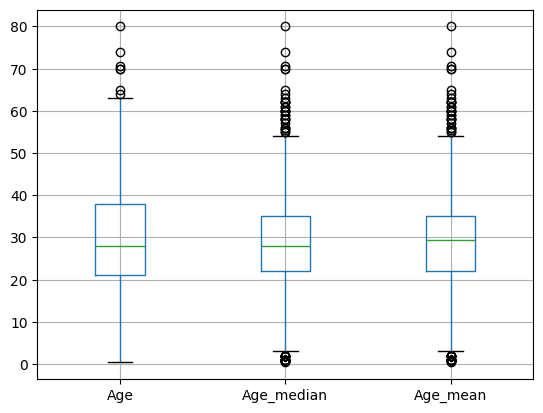

In [21]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

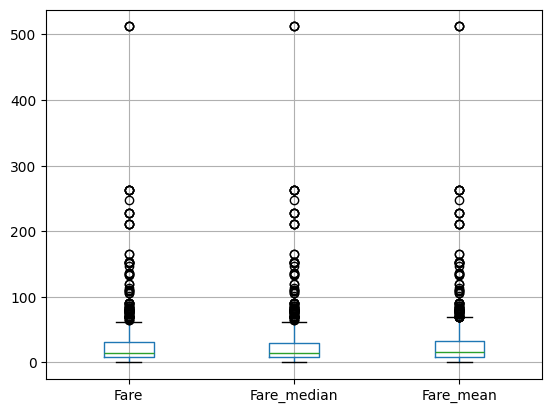

In [22]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

In [23]:
# inshort : there are red flags in Age Imputation : so we can use this imputaion in only Fare data

## Using Sklearn

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [40]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [41]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [42]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [43]:

trf.named_transformers_['imputer1'].statistics_

array([28.])

In [44]:
trf.named_transformers_['imputer2'].statistics_

array([33.3625614])

In [45]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [46]:
X_train

array([[17.       ,  7.925    ,  6.       ],
       [28.       , 24.15     ,  1.       ],
       [34.       , 13.       ,  0.       ],
       ...,
       [25.       , 13.       ,  0.       ],
       [19.       ,  7.8542   ,  1.       ],
       [30.       , 33.3625614,  0.       ]])

### SimpleImputer Parameters (scikit-learn)

| Parameter        | Purpose                                 | Default Value |
|------------------|------------------------------------------|---------------|
| `missing_values` | Defines what is treated as missing       | `np.nan`      |
| `strategy`       | Method used for imputation               | `'mean'`      |
| `fill_value`     | Replacement value for constant strategy  | `None`*       |
| `copy`           | Whether to copy data                     | `True`        |
| `add_indicator`  | Adds missingness indicator features      | `False`       |
